In [29]:
!pip install catboost

In [30]:
import math
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from catboost import CatBoostClassifier

In [31]:
path = "/content/train_FD001.txt"

eda_trainset1 = pd.read_csv(path, sep=" ", header=None)

eda_trainset1.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


<Axes: >

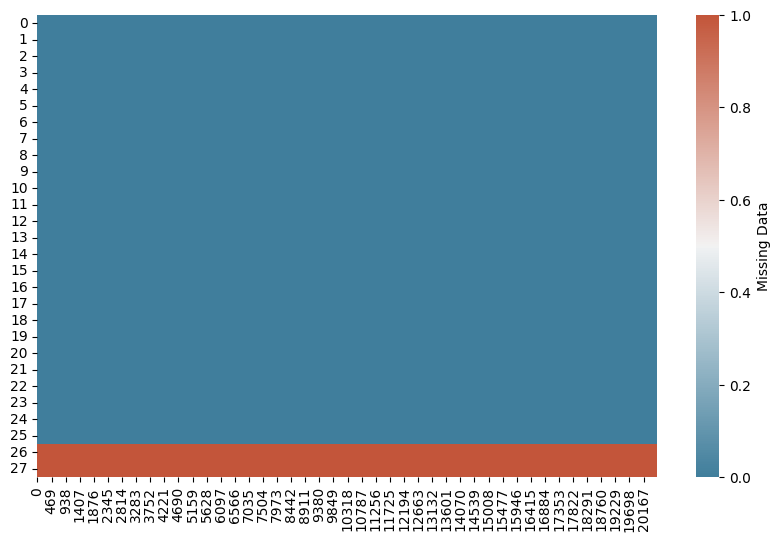

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(eda_trainset1.isna().transpose(),
            cmap = sns.diverging_palette(230, 20, as_cmap=True),
            cbar_kws={'label': 'Missing Data'})

In [33]:
column_names = ["unit_number","time_in_cycles","setting1","setting2","setting3",
                "s01","s02",
                "s03","s04",
                "s05","s06",
                "s07","s08",
                "s09","s10",
                "s11","s12",
                "s13","s14",
                "s15","s16",
                "s17","s18",
                "s19","s20",
                "s21","s22","s23"]

In [34]:
eda_trainset1.columns = column_names
eda_trainset1.head()

,unit_number,time_in_cycles,setting1,setting2,setting3,s01,s02,s03,s04,s05,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [35]:
eda_trainset1.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
time_in_cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s01,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s02,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s03,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s04,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s05,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


<Axes: >

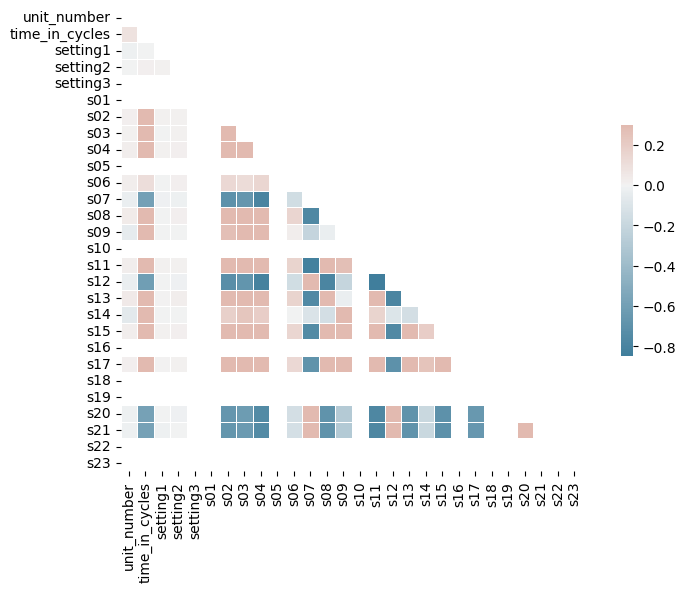

In [36]:
corr = eda_trainset1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
eda_trainset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   setting1        20631 non-null  float64
 3   setting2        20631 non-null  float64
 4   setting3        20631 non-null  float64
 5   s01             20631 non-null  float64
 6   s02             20631 non-null  float64
 7   s03             20631 non-null  float64
 8   s04             20631 non-null  float64
 9   s05             20631 non-null  float64
 10  s06             20631 non-null  float64
 11  s07             20631 non-null  float64
 12  s08             20631 non-null  float64
 13  s09             20631 non-null  float64
 14  s10             20631 non-null  float64
 15  s11             20631 non-null  float64
 16  s12             20631 non-null  float64
 17  s13             20631 non-null 

In [38]:
df = eda_trainset1

In [39]:
df.isnull().sum()

,0
unit_number,0
time_in_cycles,0
setting1,0
setting2,0
setting3,0
s01,0
s02,0
s03,0
s04,0
s05,0


In [40]:
df.drop(['s22','s23'], axis=1, inplace=True)

In [41]:
df.isnull().sum()

,0
unit_number,0
time_in_cycles,0
setting1,0
setting2,0
setting3,0
s01,0
s02,0
s03,0
s04,0
s05,0


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [43]:
df.columns

Index(['unit_number', 'time_in_cycles', 'setting1', 'setting2', 'setting3',
       's01', 's02', 's03', 's04', 's05', 's06', 's07', 's08', 's09', 's10',
       's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20',
       's21'],
      dtype='object')

In [44]:
# Making an array which contains EOL of all the Ids
EOL = []
for i in df['unit_number']:
    EOL.append(((df[df['unit_number'] == i]['time_in_cycles']).values)[-1])

df["EOL"] = EOL

# Calculate "LR"
df["LR"] = df["time_in_cycles"].div(df["EOL"])

# Create 'label' column
bins = [0, 0.6, 0.8, np.inf]
labels = [0, 1, 2]
df['label'] = pd.cut(df['LR'], bins=bins, labels=labels, right=False)

In [45]:
df.columns

Index(['unit_number', 'time_in_cycles', 'setting1', 'setting2', 'setting3',
       's01', 's02', 's03', 's04', 's05', 's06', 's07', 's08', 's09', 's10',
       's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20',
       's21', 'EOL', 'LR', 'label'],
      dtype='object')

In [46]:
X=df.drop(['label'], axis=1)
y=df['label']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape, X_test.shape

((16504, 28), (4127, 28))

In [49]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)
print(f'Training_accuracy: {accuracy_score(y_train, train_pred)}')
print(confusion_matrix(y_train, train_pred))
print()
print()
print(f'Testing_accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

Training_accuracy: 0.9869728550654386
[[9759   38    0]
 [  53 3206   59]
 [   0   65 3324]]


Testing_accuracy: 0.9854615943784831
[[2503   15    0]
 [  10  782   20]
 [   0   15  782]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print(f'Training_accuracy: {accuracy_score(y_train, train_pred)}')
print(confusion_matrix(y_train, train_pred))
print()
print()
print(f'Testing_accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

Training_accuracy: 1.0
[[9797    0    0]
 [   0 3318    0]
 [   0    0 3389]]


Testing_accuracy: 1.0
[[2518    0    0]
 [   0  812    0]
 [   0    0  797]]


In [51]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print(f'Training_accuracy: {accuracy_score(y_train, train_pred)}')
print(confusion_matrix(y_train, train_pred))
print()
print()
print(f'Testing_accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

Training_accuracy: 1.0
[[9797    0    0]
 [   0 3318    0]
 [   0    0 3389]]


Testing_accuracy: 1.0
[[2518    0    0]
 [   0  812    0]
 [   0    0  797]]


In [52]:
model = SVC()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print(f'Training_accuracy: {accuracy_score(y_train, train_pred)}')
print(confusion_matrix(y_train, train_pred))
print()
print()
print(f'Testing_accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

Training_accuracy: 0.5961585070285992
[[9797    0    0]
 [3318    0    0]
 [3347    0   42]]


Testing_accuracy: 0.6132784104676521
[[2518    0    0]
 [ 812    0    0]
 [ 784    0   13]]
